In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv('/home/chris/Documents/Datasets/creditcard.csv')

In [3]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Class"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

train_set = train_set.reset_index(drop = True)
credit_card = train_set.copy()

splitcv = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=43)
for train_index, cv_index in splitcv.split(credit_card, credit_card["Class"]):
    train60_set = credit_card.loc[train_index]
    cv_set = credit_card.loc[cv_index]
    
train60_set = train60_set.reset_index(drop = True)
cv_set = cv_set.reset_index(drop = True)
credit_card60 = train60_set.copy()
credit_card_cv = cv_set.copy()

In [4]:
m,n = credit_card60.shape
X_train60 = credit_card60.iloc[:,0:(n-1)]
y_train60 = credit_card60.iloc[:,n-1]
X_cv = credit_card_cv.iloc[:,0:(n-1)]
y_cv = credit_card_cv.iloc[:,n-1]

data = X_train60
scaler = StandardScaler()
scaler.fit(data)
X_train60_scaled = scaler.transform(data)

data = X_cv
scaler = StandardScaler()
scaler.fit(data)
X_cv_scaled = scaler.transform(data)

In [10]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

Text(0.5,1,'2-class Precision-Recall curve: AUC=0.79')

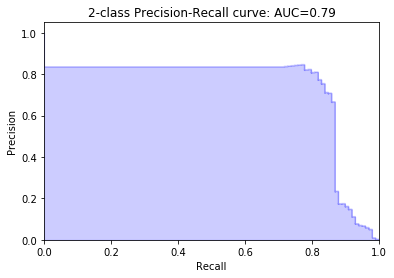

In [8]:
ldaclf = LinearDiscriminantAnalysis()
ldaclf.fit(X_train60_scaled,y_train60)
y_cv_pred_prob = ldaclf.predict_proba(X_cv_scaled)

precision, recall, threshold = precision_recall_curve(y_cv, y_cv_pred_prob[:,1])
area_under_curve = auc(recall,precision)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          area_under_curve))

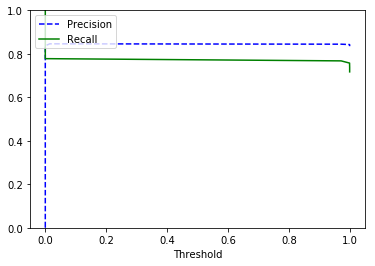

In [11]:
plot_precision_recall_vs_threshold(precision, recall, threshold)
plt.show()

In [6]:
from imblearn.over_sampling import SMOTE, ADASYN
X_60resampled, y_60resampled = SMOTE(random_state=42).fit_sample(X_train60_scaled, y_train60)


Text(0.5,1,'2-class Precision-Recall curve: AUC=0.28')

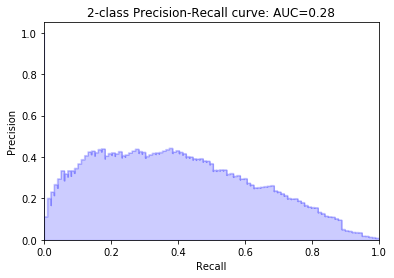

In [7]:
ldaclf = LinearDiscriminantAnalysis()
ldaclf.fit(X_60resampled,y_60resampled)
y_cv_pred_prob = ldaclf.predict_proba(X_cv_scaled)

precision, recall, _ = precision_recall_curve(y_cv, y_cv_pred_prob[:,1])
area_under_curve = auc(recall,precision)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          area_under_curve))

In [12]:
X_train60_cnn_resampled = np.loadtxt("/home/chris/Documents/ml/credit-card-fraud/cnntrain60.csv",delimiter=",")
y_train60_cnn_resampled = np.loadtxt("/home/chris/Documents/ml/credit-card-fraud/cnnlabel60.csv",delimiter=",")

Text(0.5,1,'2-class Precision-Recall curve: AUC=0.67')

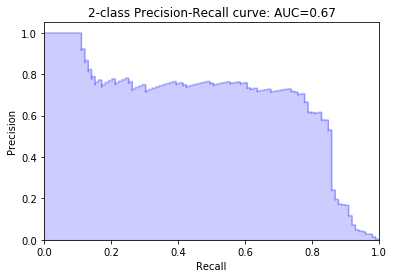

In [13]:
ldaclf = LinearDiscriminantAnalysis()
ldaclf.fit(X_train60_cnn_resampled,y_train60_cnn_resampled)
y_cv_pred_prob = ldaclf.predict_proba(X_cv_scaled)

precision, recall, _ = precision_recall_curve(y_cv, y_cv_pred_prob[:,1])
area_under_curve = auc(recall,precision)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          area_under_curve))

In [14]:
X_train60_scaled_no_time = X_train60_scaled[:,1:(n-1)]
X_cv_scaled_no_time = X_cv_scaled[:,1:(n-1)]

Text(0.5,1,'2-class Precision-Recall curve: AUC=0.79')

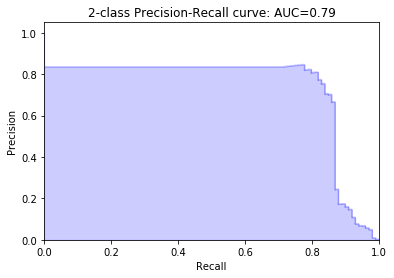

In [15]:
ldaclf = LinearDiscriminantAnalysis()
ldaclf.fit(X_train60_scaled_no_time,y_train60)
y_cv_pred_prob = ldaclf.predict_proba(X_cv_scaled_no_time)

precision, recall, threshold = precision_recall_curve(y_cv, y_cv_pred_prob[:,1])
area_under_curve = auc(recall,precision)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          area_under_curve))